# We Rate Dogs 

In [1]:
# importing all the required packages.
import pandas as pd 
import numpy as np
import requests
import tweepy
import json
import matplotlib.pyplot as plt

## Gathering 
resources :
1. the `twitter_archive_enhanced.csv` file availble locally besides the notebook.
2. the `image-prediction.tsv` file available on the internet we will retrieve it using requests library.
3. the `json_tweets.json` file that includes more data about the tweets fetched from Twitter's API (at minimum) tweet ID, retweet count, and favorite count.

In [2]:
#1
twitter_archive  = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [3]:
#2
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image-predictions.tsv',mode = 'wb') as file:
    file.write(response.content)
    
image_predections = pd.read_csv('image-predictions.tsv',sep = '\t')
image_predections.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [4]:
#3
tweepy_Oauth = tweepy.OAuthHandler('ADD YOUR KEYS HERE','ADD YOUR KEYS HERE')
tweepy_Oauth.set_access_token('ADD YOUR KEYS HERE',
                             'ADD YOUR KEYS HERE')
connector = tweepy.API(tweepy_Oauth,
                parser = tweepy.parsers.JSONParser(), 
                wait_on_rate_limit = True, 
                wait_on_rate_limit_notify = True) 

In [5]:
fetch the tweets
tweets = []
unavailable_tweets = []
for tweet_id in twitter_archive['tweet_id']:   
   try:
       tweets.append(connector.get_status(tweet_id))
   except Exception as e:
       unavailable_tweets.append(tweet_id)

In [7]:
making a dict of tweets to create the json file
tweets_dict = []
for tweet in tweets:
    tweets_dict.append(tweet)
with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(tweets_dict, indent=4))

In [8]:
tweets_list = []
with open('tweet_json.txt', encoding='utf-8') as file:  
    json_tweets = json.load(file)
    for tweet in json_tweets:
        tweet_id = tweet['id']
        tweet_contents = tweet['text']
        tweet_url = tweet_contents[tweet_contents.find('https'):] if(tweet_contents.find('https') != -1)else "None"
        favorite_count = tweet['favorite_count']
        retweet_count = tweet['retweet_count']
        followers_count = tweet['user']['followers_count']
        following_count = tweet['user']['friends_count']
        tweet_source = tweet['source']
        source_start = tweet_source.find('>')+1
        source_end = tweet_source.find('</a>')
        application_type = tweet_source[source_start:source_end]
        retweeted_status =  tweet.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = tweet_url
        else:
            url = 'retweet'
        tweets_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'followers_count': int(followers_count),
                             'following_count': int(following_count),
                             'tweet_url': url,
                             'application_type': application_type,
                            })
        
tweet_json = pd.DataFrame(tweets_list, columns = ['tweet_id', 'favorite_count','retweet_count', 
                                                           'followers_count', 'following_count','application_type', 
                                                            'tweet_url'])

In [9]:
tweet_json.head(2)

,tweet_id,favorite_count,retweet_count,followers_count,following_count,application_type,tweet_url
0,892420643555336193,38838,8599,6843865,103,Twitter for iPhone,https://t.co/MgUWQ76dJU
1,892177421306343426,33263,6319,6843865,103,Twitter for iPhone,https://t.co/aQFSeaCu9L


## Assessing

I will do the visual assesment at first to check out some Quality or Tideness Issues then the 
programmatic assesment.

our three dataframes are `twitter_archive`,`image_predections`,`tweet_json`

### visual assesment


In [10]:
# I looked at the whole dataframe
twitter_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [11]:
# I looked at the whole dataframe
image_predections.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [12]:
# I looked at the whole dataframe
tweet_json.head(2)

,tweet_id,favorite_count,retweet_count,followers_count,following_count,application_type,tweet_url
0,892420643555336193,38838,8599,6843865,103,Twitter for iPhone,https://t.co/MgUWQ76dJU
1,892177421306343426,33263,6319,6843865,103,Twitter for iPhone,https://t.co/aQFSeaCu9L


### programmatic assesment

In [13]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
image_predections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
sum(image_predections.tweet_id.duplicated())

0

In [16]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2336 entries, 0 to 2335
Data columns (total 7 columns):
tweet_id            2336 non-null object
favorite_count      2336 non-null int64
retweet_count       2336 non-null int64
followers_count     2336 non-null int64
following_count     2336 non-null int64
application_type    2336 non-null object
tweet_url           2336 non-null object
dtypes: int64(4), object(3)
memory usage: 127.8+ KB


In [17]:
sum(tweet_json.tweet_url=='None')

57

In [18]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

#### Quality
1. useless columns  for the anaylsis in `twitter_archive` like **in_reply_to_status_id**,**in_reply_to_user_id **,**retweeted_status_user_id**,**retweeted_status_timestamp**.
2. 181 records have a **retweeted_status_id**, these will need to be exluded from the `twitter_archive` table. 
3. many wrong invalid breed names in `twitter_archive` .
4. Consistency issue with the source column because it includes the wholoe `<a>` tag while it has to be just the URL in `twitter_archive`.
5. 11 Tweets in `twitter_archive` ain't available anymore while fetching their data them from the API.
6. retweets in `tweet_json`.
7. the timestamp data type in `twitter_archive` .
8. Remove the underscore between the words in `image_predictions`.
9. tweet_id data type should be a string in both `image_predictions` and `twitter_archive`.
10.  the rating is int in `twitter_archive`.
11. the rating_denominator is less or greater than 10 in `twitter_archive`.
12. 57 URL errors in the `tweet_json`

#### Tidiness
1. the stages of the Dogs looks awful in `twitter_archive`.
2. the col names in `tweet_json` weren't matching the other tables but that was fixed while retrieving the JSON .
3. the Tables have to be combined for the analysis.
4.  the Breeds in `image_predictions` is ordered from left to right, hence if p1 is big and True then no need to the others.


## Cleaning

In [19]:
twitter_archive_clean = twitter_archive.copy()
image_predections_clean = image_predections.copy()
tweet_json_clean = tweet_json.copy()

##### Define : 
remove the reweets from the `twitter Archive` table .


##### Code 

In [20]:
twitter_archive_clean = twitter_archive_clean[pd.isnull(twitter_archive_clean['retweeted_status_id'])]

##### Test

In [21]:
sum(~twitter_archive_clean.retweeted_status_id.isnull())
# making sure that there's no retweets

0

##### Define

Remove the useless columns from the `twitter archive`

##### Code

In [22]:
list(twitter_archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [23]:
twitter_archive_clean = twitter_archive_clean.drop(
    ['in_reply_to_status_id','in_reply_to_user_id','source','retweeted_status_id','retweeted_status_user_id', 
     'retweeted_status_timestamp','expanded_urls'], axis = 1)
# the source is already in the tweet json table so i will discard it for now.

##### Test

In [24]:
twitter_archive_clean.head(1)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None


##### Define
change the data type of the time stamp to datetime.

##### Code

In [25]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

##### Test

In [26]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 186.9+ KB


##### Define
Fix the Tidiness problem in the `twitter_archive` by making just one stage column


##### Code

In [27]:
twitter_archive_clean = pd.melt(twitter_archive_clean, 
    id_vars=['tweet_id','timestamp','text','rating_numerator','rating_denominator','name'],
                               var_name='dogs', value_name='stage')
twitter_archive_clean = twitter_archive_clean.drop('dogs', 1)
twitter_archive_clean = twitter_archive_clean.sort_values('stage').drop_duplicates(subset='tweet_id', 
                                                                                        keep='last')


In [28]:
# fixing the indexing issue
twitter_archive_clean.reset_index(inplace=True)

In [29]:
twitter_archive_clean.drop(['index'],axis=1,inplace=True)

##### Test

In [30]:
twitter_archive_clean['stage'].value_counts()


None       1831
pupper      234
doggo        75
puppo        25
floofer      10
Name: stage, dtype: int64

In [31]:
twitter_archive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage
0,667443425659232256,2015-11-19 20:44:47,Exotic dog here. Long neck. Weird paws. Obsess...,6,10,None,None
1,667453023279554560,2015-11-19 21:22:56,Meet Cupcake. I would do unspeakable things fo...,11,10,Cupcake,None
2,667455448082227200,2015-11-19 21:32:34,This is Reese and Twips. Reese protects Twips....,7,10,Reese,None
3,667470559035432960,2015-11-19 22:32:36,This is a northern Wahoo named Kohl. He runs t...,11,10,a,None
4,667491009379606528,2015-11-19 23:53:52,Two dogs in this one. Both are rare Jujitsu Py...,7,10,None,None


##### Define
change the Tweet_id data type to int.


##### Code

In [32]:
tweet_json_clean.tweet_id = twitter_archive_clean.tweet_id.astype(int)

##### Test

In [33]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 7 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
stage                 2175 non-null object
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 119.0+ KB


In [34]:
image_predections_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


##### Define
convert the types of the numberator and denom, ratings to correct their values later.

##### Code

In [35]:
twitter_archive_clean.rating_denominator = twitter_archive_clean.rating_denominator.astype(float)
twitter_archive_clean.rating_numerator = twitter_archive_clean.rating_numerator.astype(float)

##### Test

In [36]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 7 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
stage                 2175 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 119.0+ KB


##### Define
correct the rating to be a value out of 10 in all cases

##### Code

In [37]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['rating_denominator'] != 0]

In [38]:
twitter_archive_clean['rating_out_of_10'] = 10 * twitter_archive_clean['rating_numerator'] / twitter_archive_clean['rating_denominator']
twitter_archive_clean.drop(['rating_numerator','rating_denominator'],axis = 1 ,inplace=True)

In [39]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.rating_out_of_10 < 50 ]

##### Test

In [58]:
twitter_archive_clean.head()

,tweet_id,timestamp,text,name,stage,rating_out_of_10
0,667443425659232256,2015-11-19 20:44:47,Exotic dog here. Long neck. Weird paws. Obsess...,None,None,6.0
1,667453023279554560,2015-11-19 21:22:56,Meet Cupcake. I would do unspeakable things fo...,Cupcake,None,11.0
2,667455448082227200,2015-11-19 21:32:34,This is Reese and Twips. Reese protects Twips....,Reese,None,7.0
3,667470559035432960,2015-11-19 22:32:36,This is a northern Wahoo named Kohl. He runs t...,None,None,11.0
4,667491009379606528,2015-11-19 23:53:52,Two dogs in this one. Both are rare Jujitsu Py...,None,None,7.0


##### Define
Remove the vague breed names from `twitter_archives`.
after a couple of check ups i found that the lowercased names are incorrect like the , a , an..etc.
so I will remove the lowercased words.

##### Code 

In [40]:
twitter_archive_clean['name'] = twitter_archive_clean.name.str.replace(r'^[a-z]+','None')
# the first character is lowercased


#### Test

In [41]:
twitter_archive_clean.head()

,tweet_id,timestamp,text,name,stage,rating_out_of_10
0,667443425659232256,2015-11-19 20:44:47,Exotic dog here. Long neck. Weird paws. Obsess...,None,None,6.0
1,667453023279554560,2015-11-19 21:22:56,Meet Cupcake. I would do unspeakable things fo...,Cupcake,None,11.0
2,667455448082227200,2015-11-19 21:32:34,This is Reese and Twips. Reese protects Twips....,Reese,None,7.0
3,667470559035432960,2015-11-19 22:32:36,This is a northern Wahoo named Kohl. He runs t...,None,None,11.0
4,667491009379606528,2015-11-19 23:53:52,Two dogs in this one. Both are rare Jujitsu Py...,None,None,7.0


In [42]:
twitter_archive_clean.name.value_counts()

None         779
Lucy          11
Charlie       11
Oliver        10
Cooper        10
Tucker         9
Penny          9
Sadie          8
Lola           8
Winston        8
Toby           7
Daisy          7
Bailey         6
Koda           6
Bo             6
Jax            6
Bella          6
Stanley        6
Oscar          6
Milo           5
Buddy          5
Scout          5
Bentley        5
Louis          5
Dave           5
Chester        5
Leo            5
Rusty          5
Maggie         4
Chip           4
            ... 
Ester          1
Godzilla       1
Chubbs         1
Bobble         1
Theo           1
O              1
Charleson      1
Rumble         1
Anthony        1
Dobby          1
Pubert         1
Brian          1
Ebby           1
Odin           1
DayZ           1
Chesney        1
Harper         1
Keet           1
Tanner         1
Jim            1
Ricky          1
Eleanor        1
Ralphus        1
Sierra         1
Skye           1
Willie         1
Kollin         1
William       

#### Define
remove the underscores from the breeds names.

#### Code


In [43]:
image_predections_clean ['p1']= image_predections_clean['p1'].str.replace('_', ' ')
image_predections_clean ['p2']= image_predections_clean['p2'].str.replace('_', ' ')
image_predections_clean ['p3']= image_predections_clean['p3'].str.replace('_', ' ')

#### Test

In [44]:
image_predections_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


##### Define
replace the probabilites cols with just one column telling the most applicable breed.


##### Code

In [45]:
breed = []

def getBreed(image_predictions_clean):
    if image_predictions_clean['p1_dog'] == True:
        breed.append(image_predictions_clean['p1'])
    elif image_predictions_clean['p2_dog'] == True:
        breed.append(image_predictions_clean['p2'])
    elif image_predictions_clean['p3_dog'] == True:
        breed.append(image_predictions_clean['p3'])
    else:
        breed.append('Not Avaiable')
        
# get the breed of each dog
image_predections_clean.apply(getBreed, axis=1)

image_predections_clean['breed'] = breed
image_predections_clean = image_predections_clean[image_predections_clean['breed'] != 'Not Avaiable']

image_predections_clean.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],axis = 1,inplace= True)

#### Test

In [46]:
image_predections_clean.head()

,tweet_id,jpg_url,img_num,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher


##### Define
remove the img_num as it's useless when combining the tables

#### Code


In [47]:
image_predections_clean.drop(['img_num'],axis = 1,inplace= True)

##### Test

In [48]:
image_predections_clean.head()

,tweet_id,jpg_url,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh springer spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature pinscher


##### Define
remove the None Urls from `tweet json`.

##### Code


In [49]:
tweet_json_clean = tweet_json_clean[tweet_json_clean['tweet_url'] != "None"]

##### Test

In [50]:
sum(tweet_json_clean.tweet_url=='None')

0

In [51]:
tweet_json_clean.head(2)

,tweet_id,favorite_count,retweet_count,followers_count,following_count,application_type,tweet_url
0,1.712759e+09,38838,8599,6843865,103,Twitter for iPhone,https://t.co/MgUWQ76dJU
1,8.117453e+07,33263,6319,6843865,103,Twitter for iPhone,https://t.co/aQFSeaCu9L


##### Define 
Combining the tables

##### Code

In [52]:
df_master1 = pd.merge(twitter_archive_clean, 
                      image_predections_clean, 
                      how = 'left', on = ['tweet_id'])

In [53]:
 df_master = pd.merge(df_master1, tweet_json_clean, 
                      how = 'left', on = ['tweet_id'])

##### Test

In [54]:
df_master.tail()

,tweet_id,timestamp,text,name,stage,rating_out_of_10,jpg_url,breed,favorite_count,retweet_count,followers_count,following_count,application_type,tweet_url
2163,738537504001953792,2016-06-03 01:07:16,This is Bayley. She fell asleep trying to esca...,Bayley,puppo,11.0,https://pbs.twimg.com/media/Cj_P7rSUgAAYQbz.jpg,chow,NaN,NaN,NaN,NaN,NaN,NaN
2164,790946055508652032,2016-10-25 16:00:09,This is Betty. She's assisting with the dishes...,Betty,puppo,12.0,https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg,golden retriever,NaN,NaN,NaN,NaN,NaN,NaN
2165,743253157753532416,2016-06-16 01:25:36,This is Kilo. He cannot reach the snackum. Nif...,Kilo,puppo,10.0,https://pbs.twimg.com/media/ClCQzFUUYAA5vAu.jpg,malamute,NaN,NaN,NaN,NaN,NaN,NaN
2166,756275833623502848,2016-07-21 23:53:04,When ur older siblings get to play in the deep...,None,puppo,10.0,https://pbs.twimg.com/media/Cn7U2xlW8AI9Pqp.jpg,Airedale,NaN,NaN,NaN,NaN,NaN,NaN
2167,752519690950500352,2016-07-11 15:07:30,Hopefully this puppo on a swing will help get ...,None,puppo,11.0,https://pbs.twimg.com/media/CnF8qVDWYAAh0g1.jpg,Labrador retriever,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
df_master.to_csv('twitter_archive_master.csv',index=False)

# Analyzing and vizualizing the data.

### the distribution of the ratings.

In [55]:
df_master.rating_out_of_10.describe()

count    2168.000000
mean       10.635454
std         2.320157
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        34.285714
Name: rating_out_of_10, dtype: float64

Text(0,0.5,'the dogs rating')

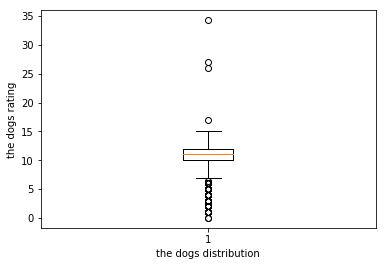

In [80]:
plt.boxplot(df_master.rating_out_of_10);
plt.xlabel('the dogs distribution')
plt.ylabel('the dogs rating')

> the average rating is 12.

### the most rated dog.

Text(0,0.5,'Breed')

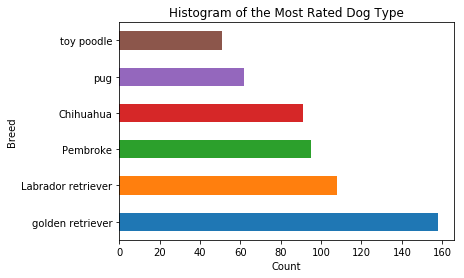

In [65]:
breed = df_master.groupby('breed').filter(lambda x: len(x) >= 50)

breed['breed'].value_counts().plot(kind = 'barh')
plt.title('Histogram of the Most Rated Dog Type')
plt.xlabel('Count')
plt.ylabel('Breed')

In [66]:
df_master[df_master.breed=='golden retriever'].describe()

,rating_out_of_10,favorite_count,retweet_count,followers_count,following_count
count,158.000000,0.0,0.0,0.0,0.0
mean,11.667516,NaN,NaN,NaN,NaN
std,2.241424,NaN,NaN,NaN,NaN
min,5.000000,NaN,NaN,NaN,NaN
25%,11.000000,NaN,NaN,NaN,NaN
50%,12.000000,NaN,NaN,NaN,NaN
75%,12.000000,NaN,NaN,NaN,NaN
max,34.285714,NaN,NaN,NaN,NaN


> the golden retriever is the most common dog with average rating equals to 11.7.

### the maximum rating number  associated with which dog?

In [77]:
df_master[df_master.rating_out_of_10 == max(df_master.rating_out_of_10)]

,tweet_id,timestamp,text,name,stage,rating_out_of_10,jpg_url,breed,favorite_count,retweet_count,followers_count,following_count,application_type,tweet_url
1137,810984652412424192,2016-12-19 23:06:23,Meet Sam. She smiles 24/7 &amp; secretly aspir...,Sam,None,34.285714,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,golden retriever,NaN,NaN,NaN,NaN,NaN,NaN


> the dog name is Sam.